# PSO effective-mass

20 November 2019

Another probe of the effective mass function, this time fitting to a small number of interlopers as subhalos.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from multiprocessing import Pool

from pso import PSOFit

from helpers import get_mass_back

In [2]:
#from multiprocessing import Process

In [3]:
## General settings ##
zl = .5
zs = 1.0

In [47]:
# zds = [.1,.2,.3,.4,.5,.6,.7,.8,.9] * 2
# seeds = [100] * 9 + [101] * 9
zds = [.1,.2,.3, .4,.5,.6,.9]
seeds = [100]*7
assert(len(zds) == len(seeds))
ilist = range(len(zds))
ncores = 4

In [48]:
def pso_fit_func(i, zd, seed):
    '''
    Just a helper function for multiprocessing.Pool
    '''
    print('running', i)
    ans = PSOFit(N=1, zd=zd, zl=zl, zs=zs,seed=seed, numiter=300)

    #pso_fit_list[i] = ans
    #ans = 'PSOFIT{}'.format(i)
    return i, ans

class CallbackList:
    def __init__(self,length):
        self.liszt = [None]*length
    
    def __repr__(self):
        return 'CallbackList'+self.liszt.__repr__()
    
    def callback(self, result):
        print('callback')
        assert(len(result) == 2)
        self.liszt[result[0]] = result[1]
        print('my list is now', self.liszt)

pso_fit_callback_list2 = CallbackList(len(zds))

In [49]:
%%time
with Pool(ncores) as pool:
    p_list = []
    for i, zd, seed in zip(ilist, zds, seeds):
        p = pool.apply_async(pso_fit_func, args=(i,zd, seed), callback=pso_fit_callback_list2.callback)
        p_list.append(p)

    for p in p_list:
        p.wait()
        
    for p in p_list:
        p.get()

running 1
running 2
running 0
running 3


2019-11-21 12:52:58,255 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.6, 'c1': 0.25, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/3002019-11-21 12:52:58,282 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.6, 'c1': 0.25, 'w': 0.9}
2019-11-21 12:52:58,271 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.6, 'c1': 0.25, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/3002019-11-21 12:52:58,292 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.6, 'c1': 0.25, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|300/300, best_cost=0.000484
2019-11-21 12:57:31,606 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0004836459891497765, best pos: [ 2.00706984e+00  8.38557569e-06 -1.21624578e+01  2.84412720e+01]


running 4


2019-11-21 12:57:31,728 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.6, 'c1': 0.25, 'w': 0.9}
pyswarms.single.global_best:  94%|█████████▎|281/300, best_cost=0.000759

callback
my list is now [<pso.PSOFit object at 0x7f06525fb6d8>, None, None, None, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=0.000759
2019-11-21 12:57:51,323 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0007588190291434066, best pos: [ 2.92825371e+00  2.06208799e-05 -6.05269625e+00  5.68596177e+01]


running 5


2019-11-21 12:57:51,448 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.6, 'c1': 0.25, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/300

callback
my list is now [<pso.PSOFit object at 0x7f06525fb6d8>, None, <pso.PSOFit object at 0x7f0684f31d68>, None, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=0.000583
2019-11-21 12:58:03,049 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0005825468305490611, best pos: [ 6.20584796e-03  1.56459420e-03 -8.34464652e+00  2.61897689e+01]


running 6


2019-11-21 12:58:03,154 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.6, 'c1': 0.25, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/300

callback
my list is now [<pso.PSOFit object at 0x7f06525fb6d8>, None, <pso.PSOFit object at 0x7f0684f31d68>, <pso.PSOFit object at 0x7f0684dbdcf8>, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=0.000816
2019-11-21 12:58:03,535 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0008162714226534948, best pos: [ 4.83777574e+00  1.41309967e-05 -3.93365336e+00  6.64277540e+01]


callback
my list is now [<pso.PSOFit object at 0x7f06525fb6d8>, <pso.PSOFit object at 0x7f0684f7c208>, <pso.PSOFit object at 0x7f0684f31d68>, <pso.PSOFit object at 0x7f0684dbdcf8>, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=0.000506
2019-11-21 13:01:54,678 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0005063059051350035, best pos: [ 6.20584796e-03  1.56459420e-03 -8.34464652e+00  2.61897689e+01]


callback
my list is now [<pso.PSOFit object at 0x7f06525fb6d8>, <pso.PSOFit object at 0x7f0684f7c208>, <pso.PSOFit object at 0x7f0684f31d68>, <pso.PSOFit object at 0x7f0684dbdcf8>, <pso.PSOFit object at 0x7f065260f240>, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=0.000184
2019-11-21 13:02:03,294 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.00018387185595332292, best pos: [ 2.92825371e+00  2.06208799e-05 -6.05269625e+00  5.68596177e+01]


callback
my list is now [<pso.PSOFit object at 0x7f06525fb6d8>, <pso.PSOFit object at 0x7f0684f7c208>, <pso.PSOFit object at 0x7f0684f31d68>, <pso.PSOFit object at 0x7f0684dbdcf8>, <pso.PSOFit object at 0x7f065260f240>, <pso.PSOFit object at 0x7f0684fe5358>, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=1.66e-5
2019-11-21 13:02:08,463 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.6634866634610866e-05, best pos: [ 3.20473344e+00  6.87437660e-06 -4.65073081e+01  9.73231178e+01]


callback
my list is now [<pso.PSOFit object at 0x7f06525fb6d8>, <pso.PSOFit object at 0x7f0684f7c208>, <pso.PSOFit object at 0x7f0684f31d68>, <pso.PSOFit object at 0x7f0684dbdcf8>, <pso.PSOFit object at 0x7f065260f240>, <pso.PSOFit object at 0x7f0684fe5358>, <pso.PSOFit object at 0x7f0684ef7da0>]
CPU times: user 3.98 s, sys: 1.62 s, total: 5.6 s
Wall time: 9min 10s


* 3 at a time : 5min14 (300 iterations, N=2)
* 2 at a time : 4min2 (300 iterations, N=2)
* 7 : 9min10 (300 iterations, N=1)

In [50]:
pso_fit_list = pso_fit_callback_list2.liszt

In [51]:
# import pickle
# with open('pso_fit_list1.p', 'wb') as f:
#     pickle.dump(pso_fit_list, f)

In [52]:
pso_fit_list[0].image_obj.kwargs_lens

[{'kappa_ext': 0.0},
 {'Rs': 0.5428748802904887,
  'alpha_Rs': 4.518448165485852e-05,
  'center_x': array(-8.61484649),
  'center_y': array(47.81715322)},
 {'center_x': 0.0,
  'center_y': 0.0,
  'e1': -0.025244677188120783,
  'e2': -0.10820529231979943,
  'gamma': 2.0,
  'theta_E': 10.0}]

Text(0, 0.5, 'rsang')

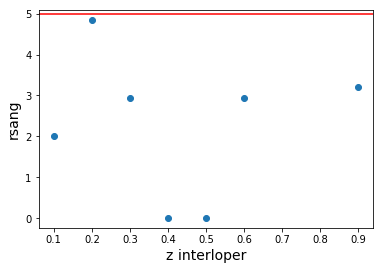

In [53]:
plt.plot(zds, [pf.pos[0] for pf in pso_fit_list], 'o')
plt.axhline(y=5, color='r', linestyle='-')
plt.xlabel('z interloper', size=14)
plt.ylabel('rsang', size=14)

Text(0, 0.5, 'alphars')

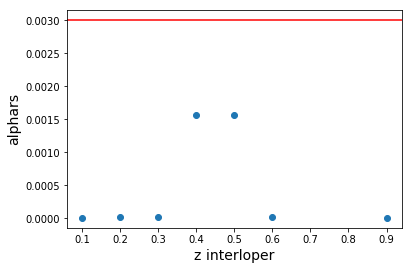

In [54]:
plt.plot(zds, [pf.pos[1] for pf in pso_fit_list], 'o')
plt.axhline(y=3e-3, color='r', linestyle='-')
plt.xlabel('z interloper', size=14)
plt.ylabel('alphars', size=14)

In [55]:
masses_sketchy = np.array([get_mass_back(pf.pos[0], pf.pos[1], zd, zs) for zd, pf in zip(zds, pso_fit_list)])
# todo check that this is the correct mass formula...

Text(0, 0.5, 'mass effective')

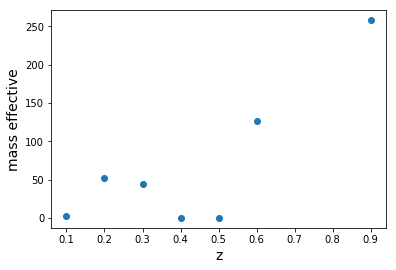

In [56]:
plt.plot(zds,masses_sketchy/1e7, 'o')
plt.xlabel('z', size=14)
plt.ylabel('mass effective', size=14)

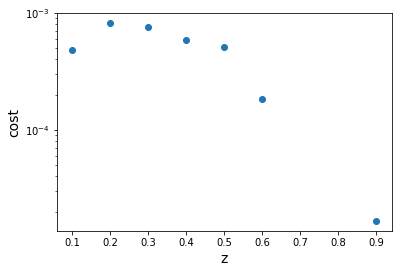

In [57]:
plt.plot(zds,[pf.cost for pf in pso_fit_list], 'o')
plt.xlabel('z', size=14)
plt.ylabel('cost', size=14)
plt.gca().set_yscale('log')

zd 0.1 (0.0004836459891497765)


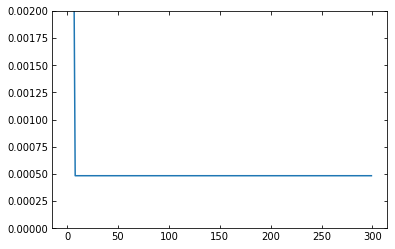

zd 0.2 (0.0008162714226534948)


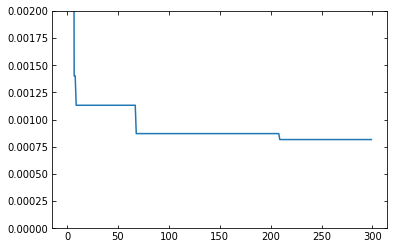

zd 0.3 (0.0007588190291434066)


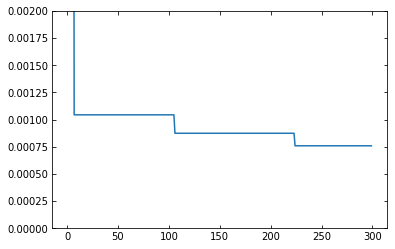

zd 0.4 (0.0005825468305490611)


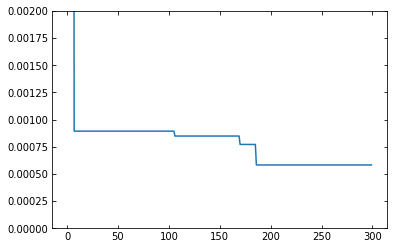

zd 0.5 (0.0005063059051350035)


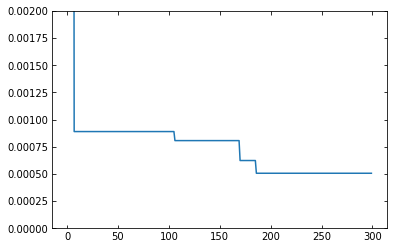

zd 0.6 (0.00018387185595332292)


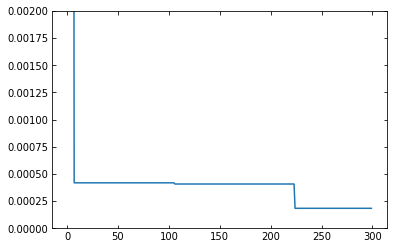

zd 0.9 (1.6634866634610866e-05)


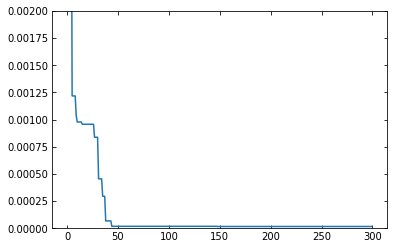

In [59]:
for zd, pso_fit in zip(zds, pso_fit_list):
    print('zd',zd, '({})'.format(pso_fit.cost))
    plt.plot(pso_fit.cost_history)
    #plt.gca().set_yscale('log')
    plt.gca().tick_params(right=True, top=True, direction='in')
    plt.ylim(0,.002)
    plt.show()

cost 0.0004836459891497765
[0.5428748802904887, 4.518448165485852e-05, array(-8.61484649), array(47.81715322)]
[ 2.00706984e+00  8.38557569e-06 -1.21624578e+01  2.84412720e+01]


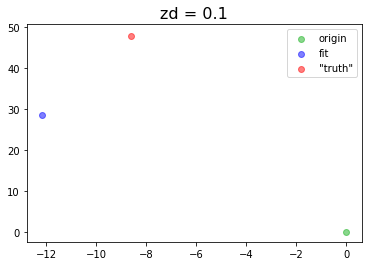

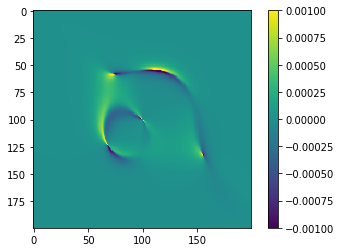

cost 0.0008162714226534948
[0.303784985137773, 6.952286183143494e-05, array(-4.82074435), array(26.7577921)]
[ 4.83777574e+00  1.41309967e-05 -3.93365336e+00  6.64277540e+01]


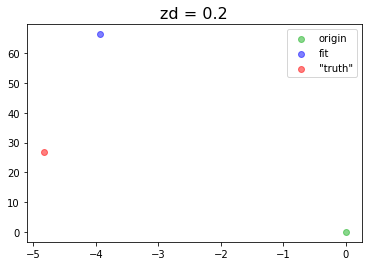

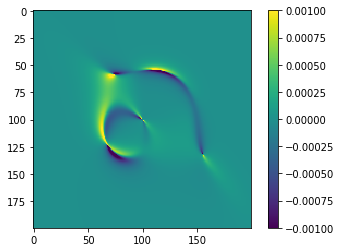

cost 0.0007588190291434066
[0.22528796282227068, 7.942824217928143e-05, array(-3.57508016), array(19.84366827)]
[ 2.92825371e+00  2.06208799e-05 -6.05269625e+00  5.68596177e+01]


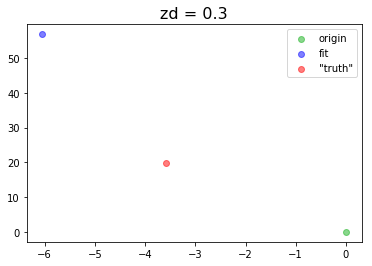

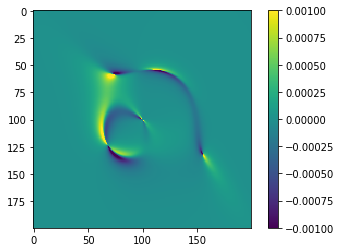

cost 0.0005825468305490611
[0.1869661773777564, 7.942797250114358e-05, array(-2.96695422), array(16.46823361)]
[ 6.20584796e-03  1.56459420e-03 -8.34464652e+00  2.61897689e+01]


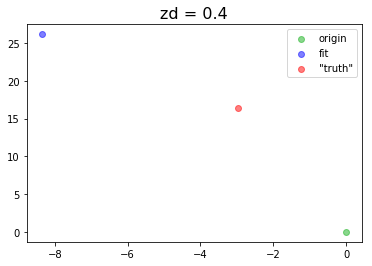

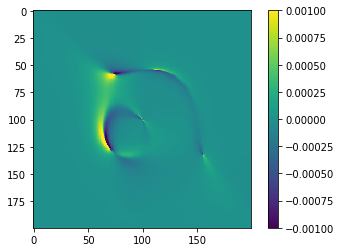

cost 0.0005063059051350035
[0.1647295558763404, 7.274484653964194e-05, array(-2.61408271), array(14.50960194)]
[ 6.20584796e-03  1.56459420e-03 -8.34464652e+00  2.61897689e+01]


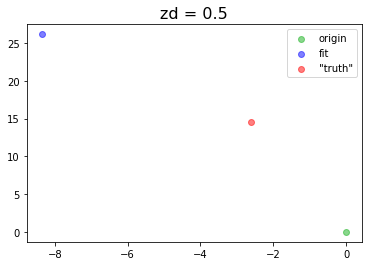

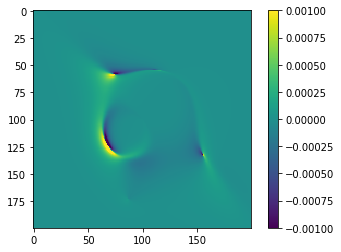

cost 0.00018387185595332292
[0.15054372876563957, 6.167925453386118e-05, array(-2.38896873), array(13.26009511)]
[ 2.92825371e+00  2.06208799e-05 -6.05269625e+00  5.68596177e+01]


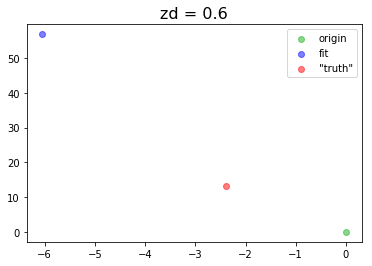

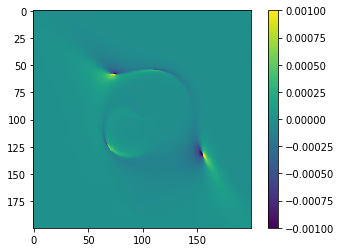

cost 1.6634866634610866e-05
[0.12947977613746603, 1.633651919477001e-05, array(-2.05470622), array(11.40475369)]
[ 3.20473344e+00  6.87437660e-06 -4.65073081e+01  9.73231178e+01]


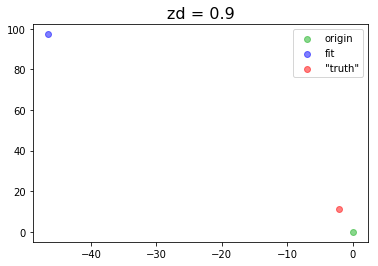

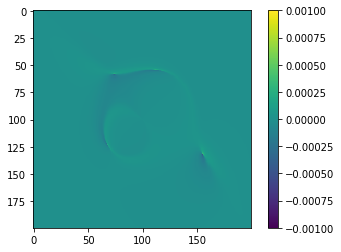

In [60]:
vmin = -.001; vmax=.001
for zd,pf in zip(zds, pso_fit_list):
    nfw_idx = 2 if zl < zd else 1 # index of first nfw lens (todo: check this)
    almost_truth_args = ([pf.image_obj.rsang, pf.image_obj.alphars]
                     +[pf.image_obj.kwargs_lens[nfw_idx+i]['center_x'] for i in range(pf.N)]
                     +[pf.image_obj.kwargs_lens[nfw_idx+i]['center_y'] for i in range(pf.N)])
    print('cost', pf.cost)
    print(almost_truth_args)
    print(pf.pos)
    
    plt.scatter([0],[0], color='xkcd:green', label='origin', alpha=.5)
    for idx in range(2,2+pf.N):
        plt.scatter(pf.pos[idx],pf.pos[idx+pf.N], color='blue', alpha=.5,
                    label='fit' if idx==2 else None)
        plt.scatter(almost_truth_args[idx], almost_truth_args[idx+pf.N], color='red', alpha=.5,
                    label='"truth"' if idx==2 else None)
    plt.legend()
    plt.title('zd = {}'.format(zd),fontsize=16)
    plt.show()
    
    masked = pf.image-pf.pso_img
    masked[100][100] = 0
    plt.imshow(masked, vmin=vmin, vmax=vmax); plt.colorbar()
    plt.show()

In [61]:
# import pickle
# with open('pso_fit_list2.p', 'wb') as f:
#     pickle.dump(pso_fit_list, f)

## Old cells...

In [ ]:
def partition(liszt, n):
    ''' Divides a list `liszt` into `n` nearly equal parts 
    (useful for pooling)'''
    lenliszt = len(liszt)
    short = lenliszt//n # how long is a short part
    nlong = lenliszt - short*n # remainder after integer division
    
    # list of lengths
    length_list = [short]*(n-nlong) + [short+1]*nlong
    
    ans = []
    counter = 0
    for length in length_list:
        ans.append(liszt[counter:counter+length])
        counter += length
        
    return ans    